In [ ]:
from michigrad.engine_extended import Value
from michigrad.nn_refactored import Layer, Tanh
from michigrad.visualize import show_graph

# XOR (⊕) es una función lógica que toma dos entradas, x_0 y x_1.
# Devuelve 0 si ambas son iguales (0,0 o 1,1) y devuelve 1 si
# son diferentes (0,1 o 1,0).

# Definimos el dataset que se usará para entrenar a la red.

# Entradas para cada caso de XOR:
entradas = [
    [
        Value(data=0),
        Value(data=0),
    ],  # 0 ⊕ 0
    [
        Value(data=0),
        Value(data=1),
    ],  # 0 ⊕ 1
    [
        Value(data=1),
        Value(data=0),
    ],  # 1 ⊕ 0
    [
        Value(data=1),
        Value(data=1),
    ],  # 1 ⊕ 1
]

# Salidas esperadas para cada entrada:
salidas = [
    Value(data=0),  # 0 ⊕ 0 = 0
    Value(data=1),  # 0 ⊕ 1 = 1
    Value(data=1),  # 1 ⊕ 0 = 1
    Value(data=0),  # 1 ⊕ 1 = 0
]


# Definir la arquitectura de la red.
# Se pide una única capa con dos neuronas con alguna función
# de activación.
# Se instancia Layer con:
# nin=2 porque cada neurona tiene dos entradas: la función XOR necesita
# dos valores para dar un resultado.
# nout=2 porque tenemos dos neuronas en la capa.
# Se instancia Tanh como función de activación.

capa_lineal = Layer(nin=2, nout=2)
activacion = Tanh()


Grafo después del forward pass y antes del backward pass:


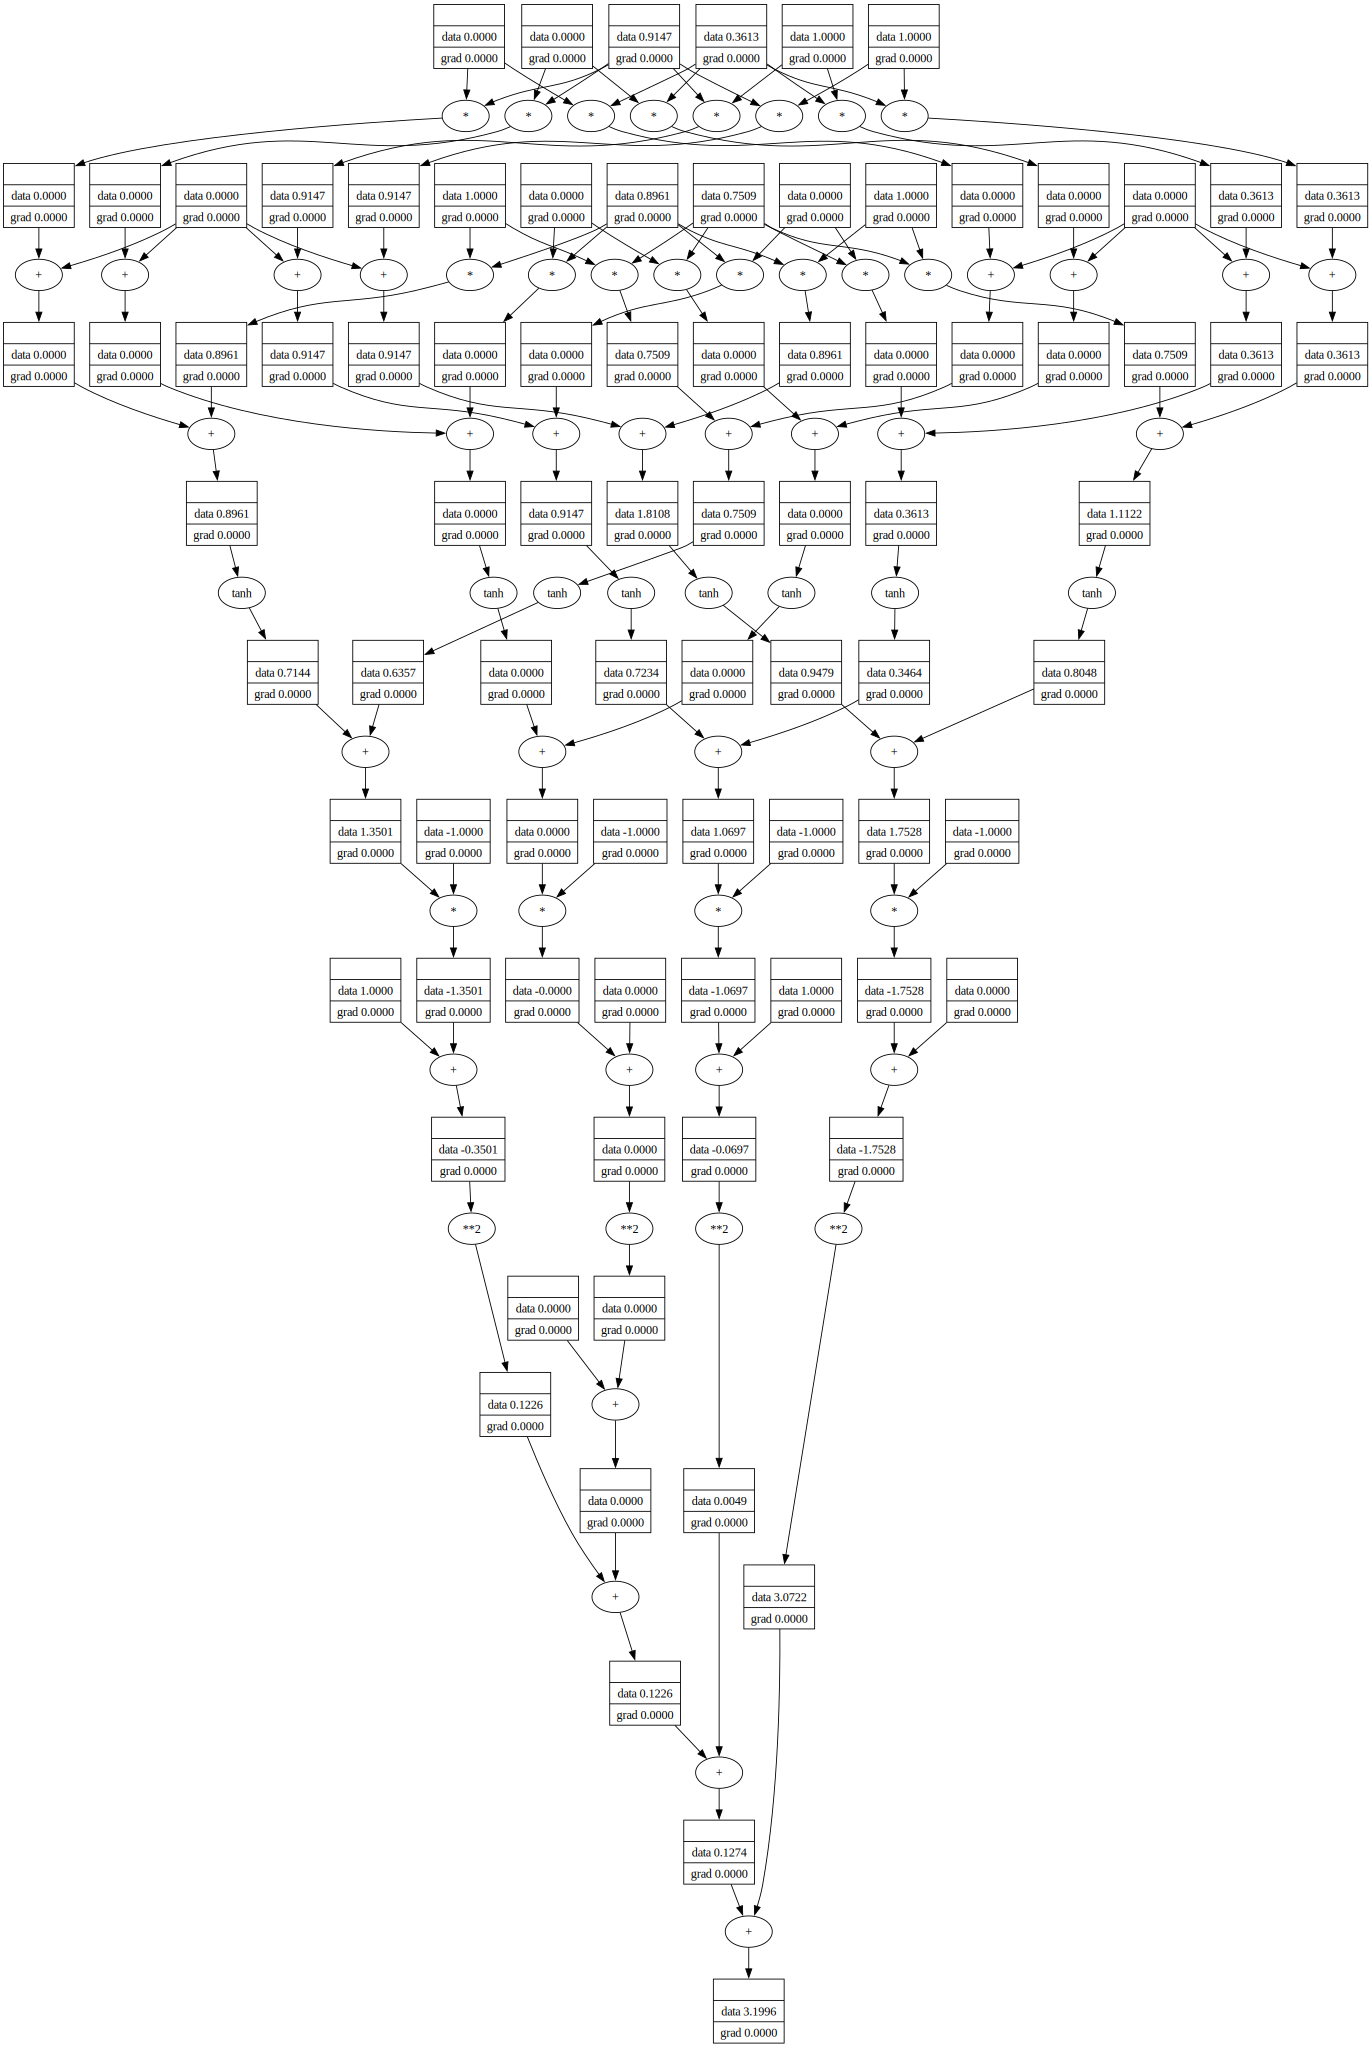

Grafo después del backward pass:


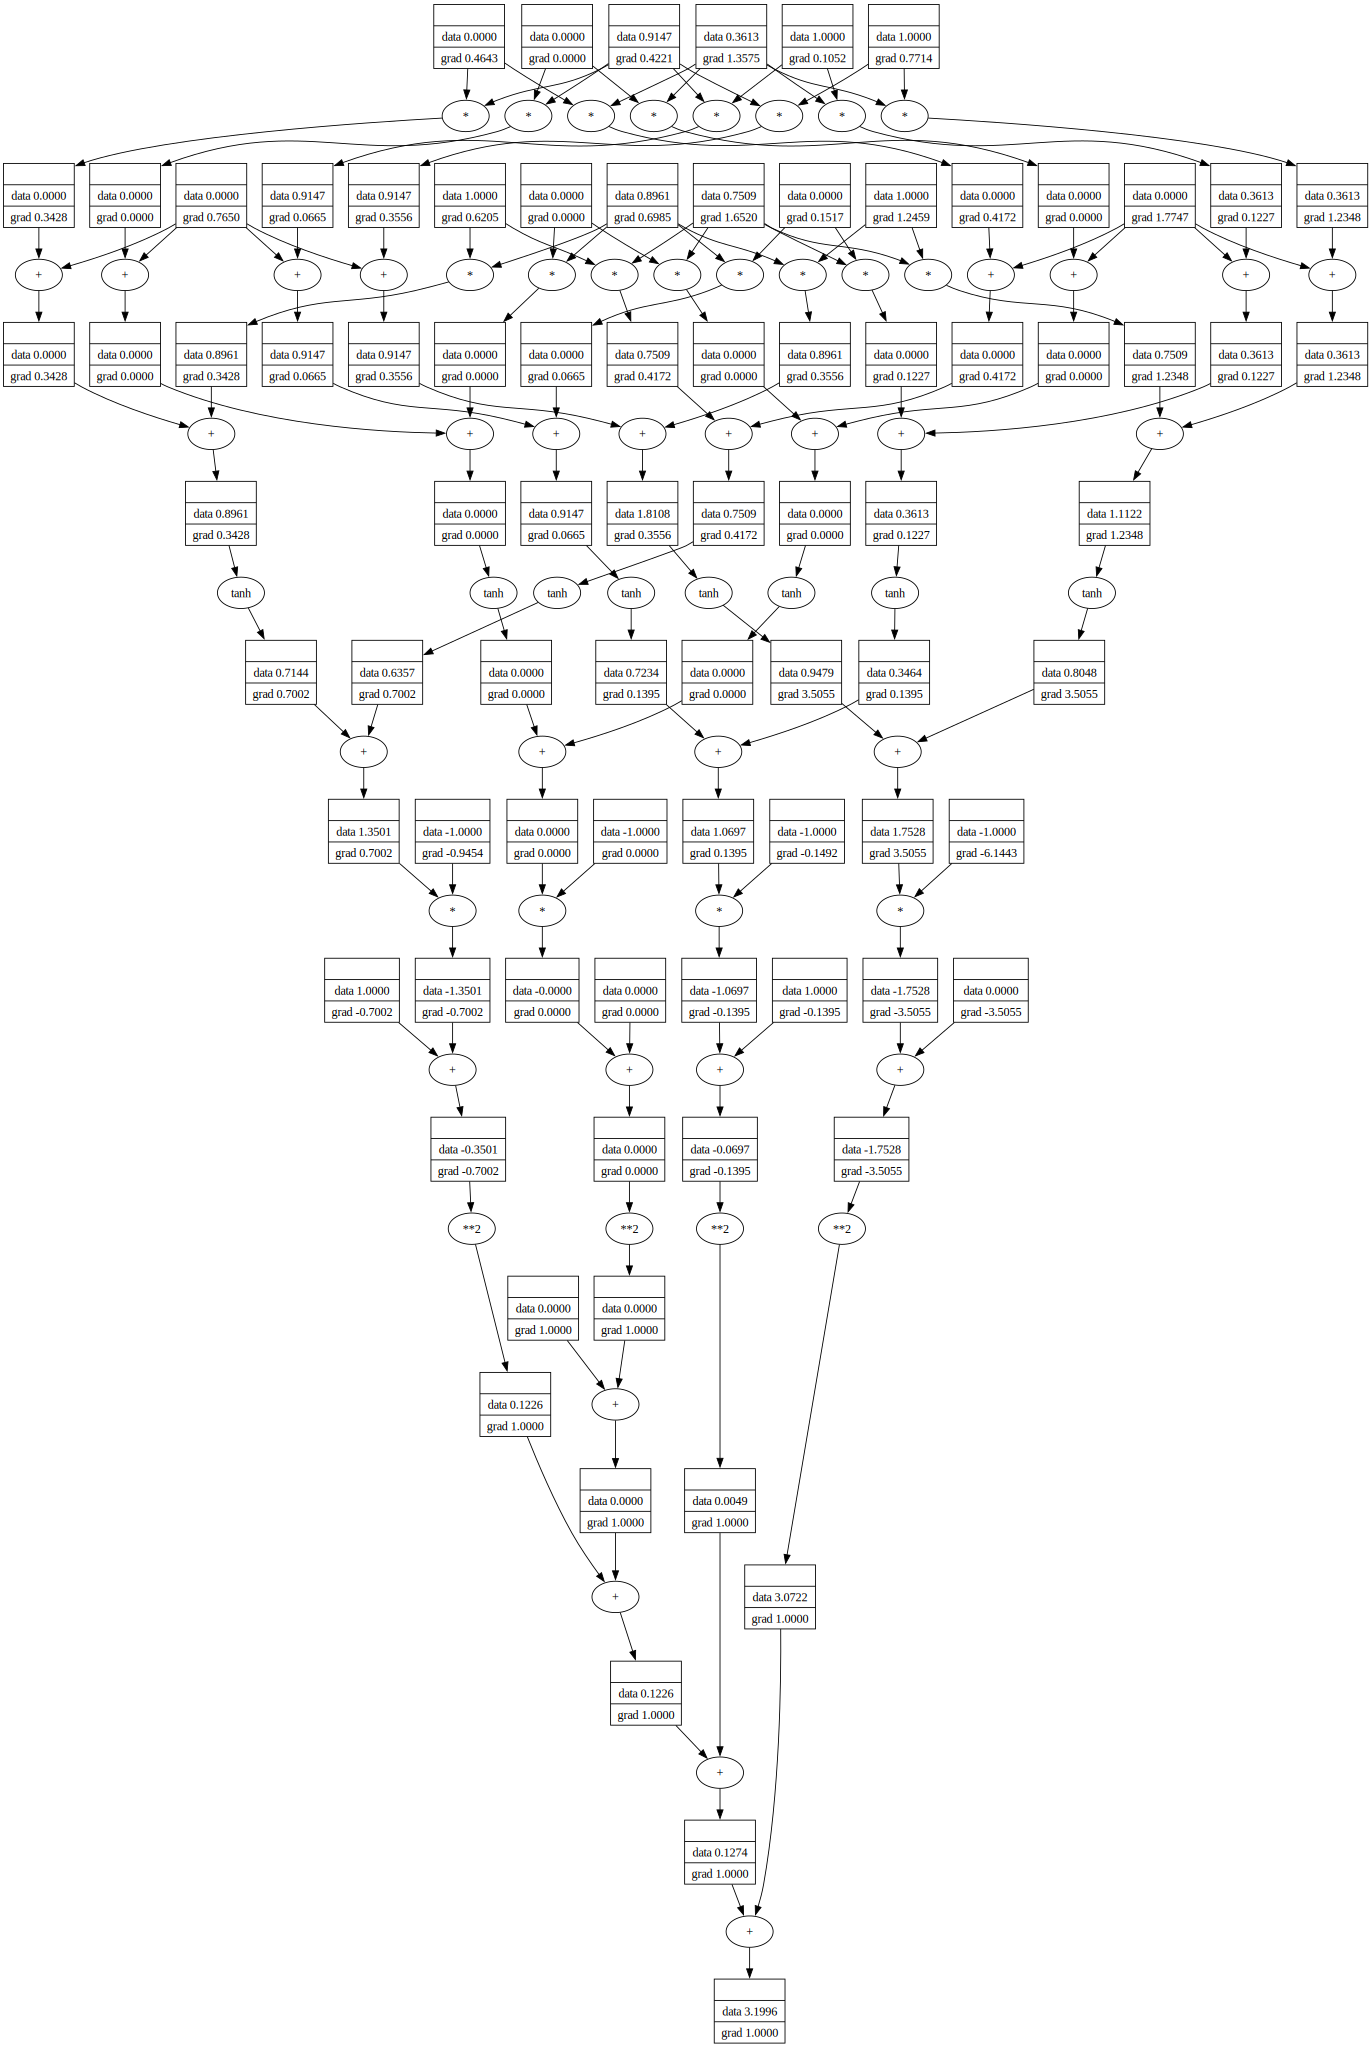

Iteración 0: pérdida = 3.199594447160761
Iteración 2: pérdida = 2.326059034332884
Iteración 4: pérdida = 1.5756631658643032
Iteración 6: pérdida = 1.162932459615341
Iteración 8: pérdida = 0.955869169870303
Iteración 10: pérdida = 0.845506454025793
Iteración 12: pérdida = 0.7828265524951707
Iteración 14: pérdida = 0.7444261511276378
Iteración 16: pérdida = 0.7188532850212503
Iteración 18: pérdida = 0.7002733407531216
Iteración 20: pérdida = 0.685595474765776
Iteración 22: pérdida = 0.6731301875172426
Iteración 24: pérdida = 0.6619326037675572
Iteración 26: pérdida = 0.6514663798375209
Iteración 28: pérdida = 0.6414248755151446
Iteración 30: pérdida = 0.6316329366178678
Iteración 32: pérdida = 0.6219915926061304
Iteración 34: pérdida = 0.6124463282131569
Iteración 36: pérdida = 0.6029686328723247
Iteración 38: pérdida = 0.5935451738036333
Iteración 40: pérdida = 0.5841714081319329
Iteración 42: pérdida = 0.5748478044262904
Iteración 44: pérdida = 0.5655776070137741
Iteración 46: pérdida 

In [ ]:
# Definir el learning rate
learning_rate = 0.05

# Bucle de entrenamiento
for i in range(50):
    # Reiniciar la pérdida total a 0
    perdida = Value(data=0)

    # Paso 1 y 2: Forward pass y cálculo de pérdida
    # Para cada entrada, calcular la salida predicha por la red
    # y compararla con la salida esperada para calcular la pérdida.
    for entrada, salida_esperada in zip(entradas, salidas):
        # Tenemos dos salidas porque la capa tiene dos neuronas.
        # La salida predicha será la suma de las salidas de ambas neuronas
        # más la función de activación aplicada a cada una.
        salida_predicha = capa_lineal(x=entrada)

        # Aplicar la función de activación Tanh a las dos salidas, una
        # de cada neurona.
        salida_predicha = activacion(salida_predicha)

        salida_total = salida_predicha[0] + salida_predicha[1]
        perdida = perdida + ((salida_esperada - salida_total) ** 2)

    # Solo en la primer iteración, imprimir el grafo después del forward pass
    if i == 0:
        print("Grafo después del forward pass y antes del backward pass:")
        grafo = show_graph(root=perdida, format="png", rankdir="TB")
        display(grafo)

    # Paso 3: Zero grad (reiniciar gradientes)
    capa_lineal.zero_grad()

    # Paso 4: Backward pass
    perdida.backward()

    # Solo en la primer iteración, imprimir el grafo después del backward pass
    if i == 0:
        print("Grafo después del backward pass:")
        grafo = show_graph(root=perdida, format="png", rankdir="TB")
        display(grafo)

    # Paso 5: Update de parámetros
    for parametro in capa_lineal.parameters():
        parametro.data = parametro.data - (learning_rate * parametro.grad)

    if i % 2 == 0:
        print(f"Iteración {i}: pérdida = {perdida.data}")
